Import libraries

In [0]:
import numpy as np
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from operator import add
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

A function to compute RMS error for a given train set and validation set

In [0]:
def compute_rms(x_train, x_validation, y_train, y_validation):

  error_all_degrees = []
  for degree in d:

    z = np.polyfit(x_train, y_train, degree)
    p = np.poly1d(z)
    y_pred = []
    for x in x_validation:
      y_pred.append(p(x))
   
    rmse = sqrt(mean_squared_error(y_validation, y_pred))
    error_all_degrees.append(rmse)

  return error_all_degrees


Plot error for degrees in range(0,10) for a given k value

In [0]:
def plot_error(i, errors, d):

  plt.title('error for different degrees ')
  plt.scatter(d, errors,c='red')
  plt.xlabel('degrees')
  plt.ylabel('RMSE')
  plt.show()

Compute error with best degree on test data

In [0]:
def plot_curve_best_degree(degree):

  z = np.polyfit(data_train, label_train, degree)
  p = np.poly1d(z)

  y_pred = []

  for t in data_test:
    y_pred.append(p(t))
   
  rmse = sqrt(mean_squared_error(label_test, y_pred))
  print("Error on test set with best degree : ", rmse)

  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(data_test, label_test, c='r', marker="s", label='real')
  ax.scatter(data_test, p(data_test), c='b', marker="o", label='predicted')
  plt.legend(loc='upper left');
  plt.show()

In [0]:
def run(data_train, label_train, k, d):
  
  for i in k:

    error_all_degrees = np.zeros(len(d))
    kf = KFold(n_splits=i) 
    for train_index, validation_index in kf.split(data_train):

      x_train, x_validation = data_train[train_index], data_train[validation_index] 
      y_train, y_validation = label_train[train_index], label_train[validation_index]
      error = compute_rms(x_train, x_validation, y_train, y_validation)
      error_all_degrees = list(map(add, error, error_all_degrees))

    error_all_degrees = np.true_divide(error_all_degrees, i) 
    print("error for k = ", i, error_all_degrees)
    print("best degree for k = ", i, ":", min(error_all_degrees), "for degree = ", list(error_all_degrees).index(min(error_all_degrees)))
    plot_error(i, error_all_degrees, d)
    plot_curve_best_degree(list(error_all_degrees).index(min(error_all_degrees)))

    print("===============================")


Reading data from files

In [0]:
data_path = "/content/drive/My Drive/ML_HW1/data/1/x.txt"
label_path = "/content/drive/My Drive/ML_HW1/data/1/y.txt"
x = np.loadtxt(data_path)
y = np.loadtxt(label_path)


Split data into test and train sets

In [0]:
data_train, data_test, label_train, label_test = train_test_split(x, y, test_size=0.2)

In [28]:
print(len(data_train))
print(len(data_test))

k = [2, 5, 10, len(data_train)]
d = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

40
10


results on 1st dataset

error for k =  2 [11636.17689999  7007.98196135  6955.42073905  1499.60219301
  1702.64964108  1274.24270539  1332.95477688  1432.22164301
  1450.67192582  1945.62605568  1774.86588656]
best degree for k =  2 : 1274.242705389714 for degree =  5


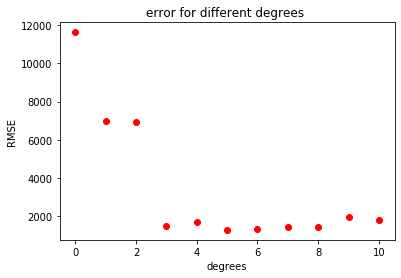

Error on test set with best degree :  1654.731351074267


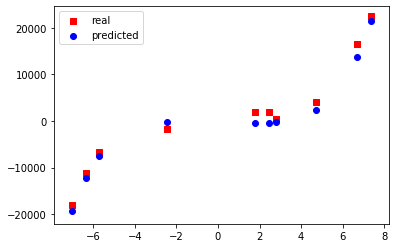

error for k =  5 [10424.60573324  7386.5190666   7396.49910107  1687.73472597
  1861.95655049  1113.16831749  1117.70764429  1150.77322172
  1465.34622939  1412.35288735  1368.10427439]
best degree for k =  5 : 1113.1683174925645 for degree =  5


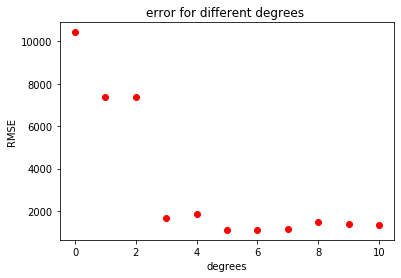

Error on test set with best degree :  1654.731351074267


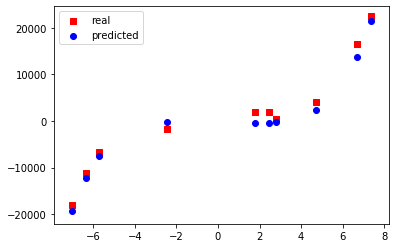

error for k =  10 [9983.57585555 7096.5213506  7495.44565671 1687.14741927 1785.31834352
 1063.70775567 1062.63983301 1132.26793109 1251.44964083 1323.50969761
 1521.85606734]
best degree for k =  10 : 1062.6398330117324 for degree =  6


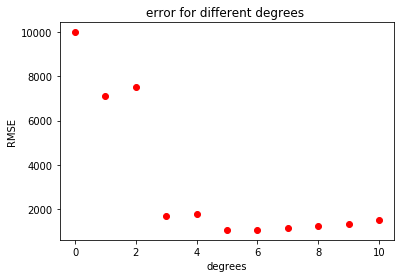

Error on test set with best degree :  1691.2855197034157


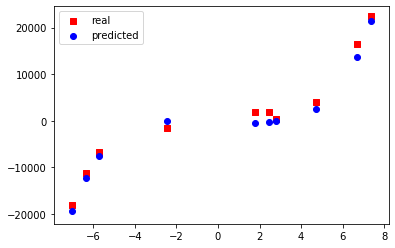

error for k =  40 [6686.79859424 5848.22368642 6091.71611587 1321.66672034 1383.27745871
  945.77967901  958.5043848  1006.25887224 1036.86253244 1081.84964889
 1096.43154266]
best degree for k =  40 : 945.7796790105238 for degree =  5


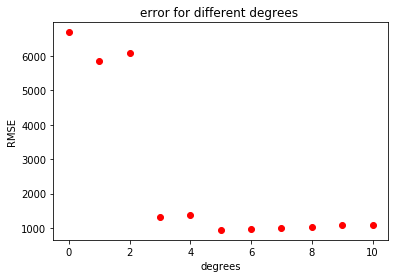

Error on test set with best degree :  1654.731351074267


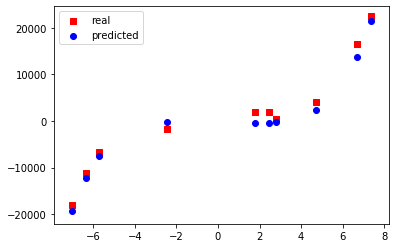

In [32]:
run(data_train, label_train, k, d)

Results on 2nd dataset

error for k =  2 [11830.82351756  7478.16101472  9338.61095228  2417.036487
  2730.31623057   280.48981382   377.27362772   450.26727044
   622.31945598  1116.965125    2061.96499605]
best degree for k =  2 : 280.4898138213677 for degree =  5


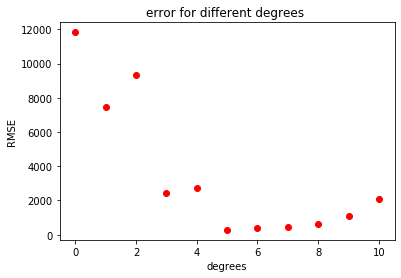

Error on test set with best degree :  303.0613551449425


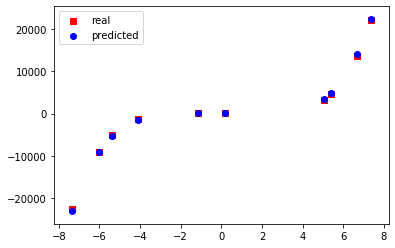

error for k =  5 [11524.48332509  6997.93355519  7993.94249914  1957.06646718
  2426.99053108   225.96337375   257.90622544   375.02120998
   414.01602968   406.51722102   343.61588215]
best degree for k =  5 : 225.96337375101152 for degree =  5


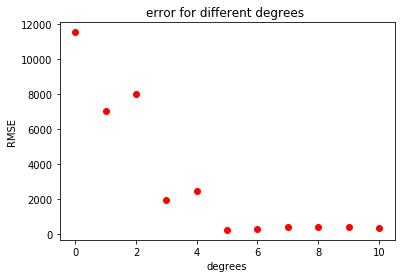

Error on test set with best degree :  303.0613551449425


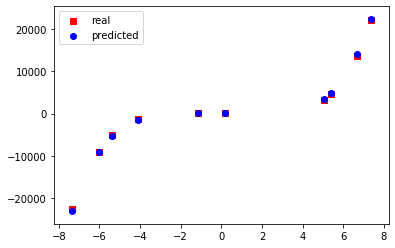

error for k =  10 [9466.85313762 6853.23670108 7572.51543203 1885.13232149 2194.99922149
  214.05016401  245.71529849  323.50861075  335.70033053  424.65439368
  295.92730748]
best degree for k =  10 : 214.05016400735113 for degree =  5


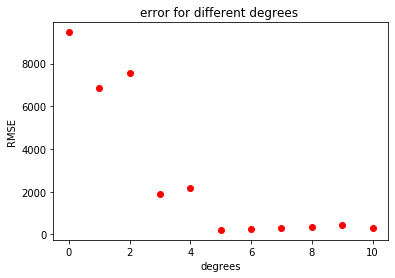

Error on test set with best degree :  303.0613551449425


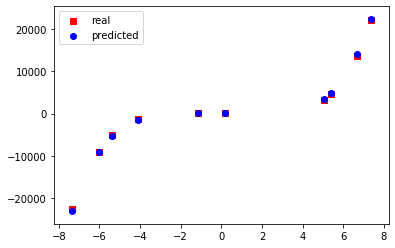

error for k =  40 [6313.54936633 5815.19311    6090.8872654  1443.36227287 1522.19615411
  197.16168234  202.9526844   196.23920055  216.56155133  236.12576962
  279.86560989]
best degree for k =  40 : 196.23920055255525 for degree =  7


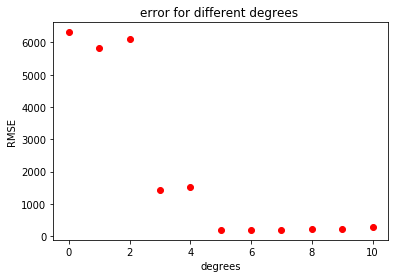

Error on test set with best degree :  338.93950280792023


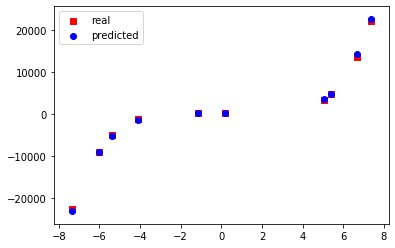

In [27]:
run(data_train, label_train, k, d)

Results on 3rd dataset

error for k =  2 [ 1334.5919165   1189.3111542    796.48060843   374.66012433
   279.33928366   680.83215072  1433.81891605  2535.47706825
  4346.81417865  7107.08016    11652.50544729]
best degree for k =  2 : 279.3392836564125 for degree =  4


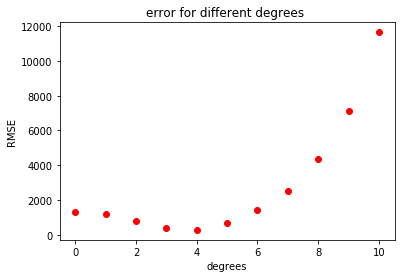

Error on test set with best degree :  2423.3189007784977


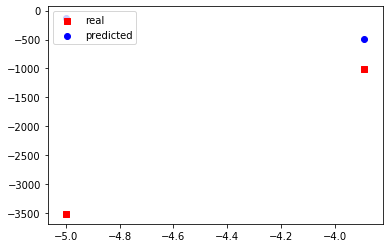

error for k =  5 [ 959.20665392  852.16193636  747.41120425  296.34439519  350.58771245
  764.50174906  743.76813064  750.28617976  851.18790579  901.31969543
 1098.41935456]
best degree for k =  5 : 296.3443951870749 for degree =  3


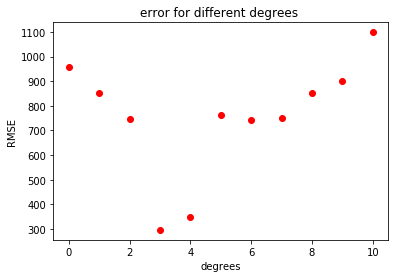

Error on test set with best degree :  545.3699239936951


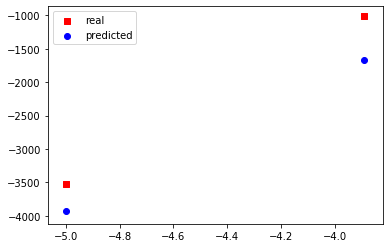

error for k =  8 [ 924.2978235   837.99541255  821.52526804  345.937285    356.62773972
  253.93936171 2441.70408195 2183.44084468 3036.05209026 3594.88232161
 5091.22143265]
best degree for k =  8 : 253.9393617102373 for degree =  5


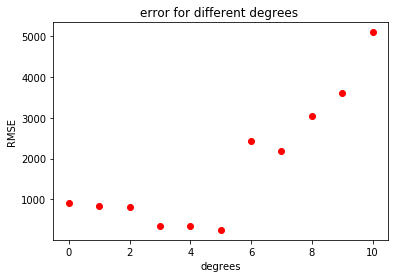

Error on test set with best degree :  1886.1302352460002


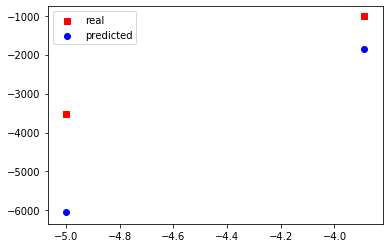

In [34]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)
run(data_train, label_train, k, d)

Results on 4th dataset

error for k =  2 [2446.42560485 2072.53075064 2665.49681173 1832.84622977 1514.96263049
 2022.06943928 1719.62938203 2100.55059804 1858.91821067 2130.3068042
 1948.43747289]
best degree for k =  2 : 1514.9626304944668 for degree =  4


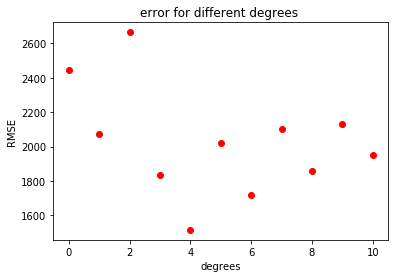

Error on test set with best degree :  431.8812897347242


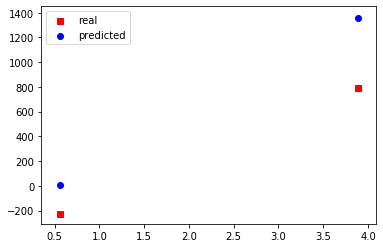

error for k =  5 [1543.44123105 1523.65237361 2341.78032808 1292.77540238 1421.48862444
 6015.94678802 3185.52941905 4914.65074468 3501.9958612  4609.38053453
 3674.76817179]
best degree for k =  5 : 1292.7754023833927 for degree =  3


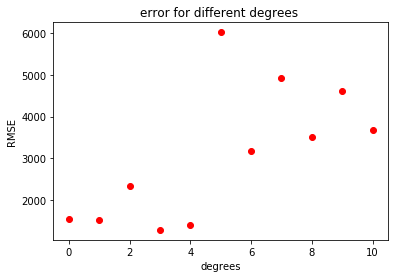

Error on test set with best degree :  387.0316702082096


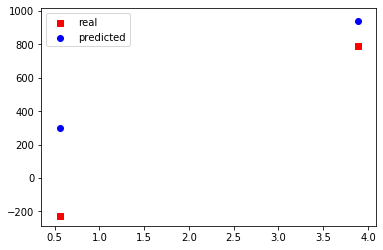

error for k =  8 [1380.77716427 1590.75684351 2453.78028019 1078.39170508 1062.03383765
 6385.17034293 2493.79785962 4734.28306868 5612.24362941 5266.75068907
 6456.38634911]
best degree for k =  8 : 1062.0338376536138 for degree =  4


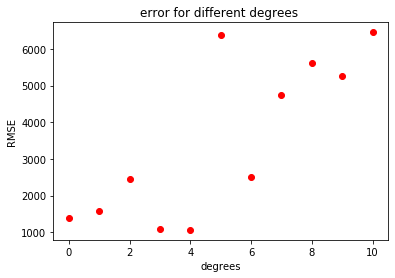

Error on test set with best degree :  431.8812897347242


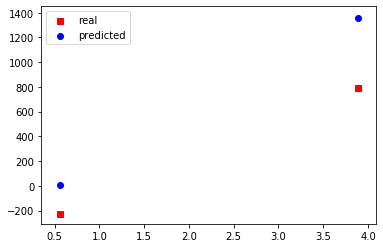

In [38]:
run(data_train, label_train, k, d)